# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 -15.01 51.2 -1.151 52.62 ... 375.8 387.8 396.7

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

/home/circleci/miniconda3/envs/docs/lib/python3.8/site-packages/psy_simple/plugin.py:423: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return {'loc': validate_legend_loc(value)}


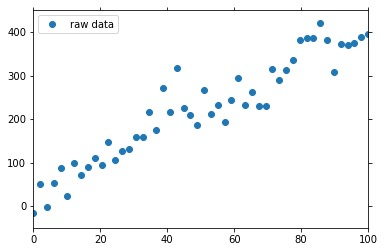

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

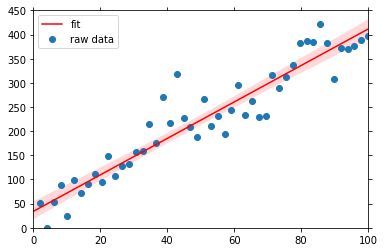

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[ 34.00895695,  37.82075523,  41.63255351,  45.44435179,
         49.25615007,  53.06794836,  56.87974664,  60.69154492,
         64.5033432 ,  68.31514148,  72.12693976,  75.93873805,
         79.75053633,  83.56233461,  87.37413289,  91.18593117,
         94.99772946,  98.80952774, 102.62132602, 106.4331243 ,
        110.24492258, 114.05672086, 117.86851915, 121.68031743,
        125.49211571, 129.30391399, 133.11571227, 136.92751056,
        140.73930884, 144.55110712, 148.3629054 , 152.17470368,
        155.98650196, 159.79830025, 163.61009853, 167.42189681,
        171.23369509, 175.04549337, 178.85729166, 182.66908994,
        186.48088822, 190.2926865 , 194.10448478, 197.91628307,
        201.72808135, 205.53987963, 209.35167791, 213.16347619,
        216.97527447, 220.78707276, 224.59887104, 228.41066932,
        232.2224676 , 236.03426588, 239.84606417, 243.65786245,
        247.46966073, 251.28145901, 255.09325729, 258.90505557,
        262.71685386, 266.52865214, 270.34045042, 274.1522487 ,
        277.96404698, 281.77584527, 285.58764355, 289.39944183,
        293.21124011, 297.02303839, 300.83483667, 304.64663496,
        308.45843324, 312.27023152, 316.0820298 , 319.89382808,
        323.70562637, 327.51742465, 331.32922293, 335.14102121,
...
        125.68490617, 129.30890459, 132.93072485, 136.48815811,
        140.10828924, 143.70163008, 147.17813162, 150.5247342 ,
        154.12895165, 157.87666957, 161.44781053, 164.97533744,
        168.50483451, 172.09516913, 175.81932107, 179.52247749,
        182.96494105, 186.70776992, 190.47098936, 194.27205091,
        197.93867095, 201.58107896, 205.17134466, 208.8881647 ,
        212.52316392, 216.14387848, 219.90465153, 223.75320267,
        227.5717564 , 231.42254923, 235.215454  , 239.1840671 ,
        243.32093201, 247.05158568, 250.97991763, 255.08287907,
        258.76887216, 262.91767858, 266.72911802, 270.60873961,
        274.67791905, 278.74814862, 282.64025423, 286.51326037,
        290.52698232, 294.45614245, 298.58749754, 302.75949518,
        306.78932705, 310.8655118 , 314.96791531, 319.07031882,
        323.01930322, 326.86243948, 330.70557574, 334.74642766,
        338.86602525, 342.98562284, 347.10522043, 351.22481802,
        355.18012943, 358.92980687, 362.67885624, 366.7226714 ,
        370.88303712, 374.82844742, 378.70751182, 382.61374732,
        386.75064006, 390.88753281, 395.02442555, 399.0942372 ,
        403.29120721, 407.30241872, 411.22800475, 415.14889891,
        419.18069042, 423.27259396, 427.36449749, 431.33737889]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    slope:      3.7736802990179017
    intercept:  34.008956946086535
    rsquared:   0.8978446960264858

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

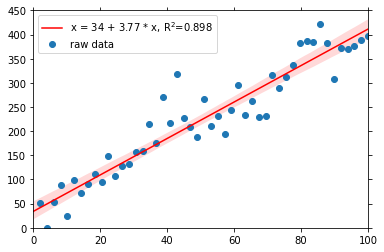

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

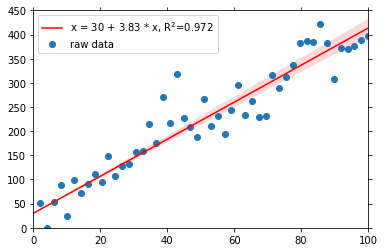

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

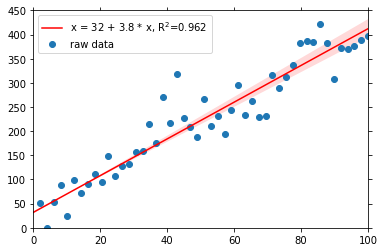

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

xrange
    Specify the range for the fit to use for the x-dimension
yrange
    Specify the range for the fit to use for the y-dimension
line_xlim
    Specify how wide the range for the plot should be
p0
    Initial parameters for the :func:`scipy.optimize.curve_fit` function
fit
    Choose the linear fitting method
fix
    Force the fit to go through a given point
nboot
    Set the number of bootstrap resamples for the confidence interval
ci
    Draw a confidence interval
ideal
    Draw an ideal line of the fit


In [10]:
psy.close('all')